**The Street View House Numbers (SVHN) Dataset**

SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes from a
significantly harder, unsolved, real world problem (recognizing digits and numbers in
natural scene images). SVHN is obtained from house numbers in Google Street View
images. 

In [14]:
import numpy as np
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import keras


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
h5FilePath="/content/drive/My Drive/Pavan/SVHN_single_grey1.h5"

In [4]:
h5FilePath

'/content/drive/My Drive/Pavan/SVHN_single_grey1.h5'

In [0]:
svhn_h5f = h5py.File(h5FilePath,"r")

In [6]:
keys=svhn_h5f.keys()
for key in keys:
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:

X_train=svhn_h5f['X_train'][:]
y_train=svhn_h5f['y_train'][:]

X_test=svhn_h5f['X_test'][:]
y_test=svhn_h5f['y_test'][:]

X_val=svhn_h5f['X_val'][:]
y_val=svhn_h5f['y_val'][:]

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
svhn_h5f.close()

In [12]:

print("Training Set",X_train.shape, y_train.shape )
print("Validation Set",X_val.shape, y_val.shape )
print("Test Set",X_test.shape, y_test.shape )

Training Set (42000, 32, 32) (42000,)
Validation Set (60000, 32, 32) (60000,)
Test Set (18000, 32, 32) (18000,)


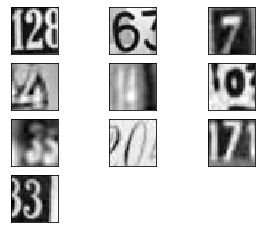

label for each of the above image:
 [2, 6, 7, 4, 4, 0, 3, 0, 7, 3]


In [15]:
labels = []

plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    lbl=y_train[i]
    labels.append(lbl)
plt.show()
print("label for each of the above image:\n", labels)

In [0]:
num_classes = 10 
# Converting class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [17]:

print(y_train.shape)
print('First 5 examples now are: \n', y_train[0:5])

(42000, 10)
First 5 examples now are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [0]:
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
X_val = X_val.reshape((X_val.shape[0], 32, 32, 1))

In [20]:
print("Training Set",X_train.shape )
print("Validation Set",X_val.shape )
print("Test Set",X_test.shape )

Training Set (42000, 32, 32, 1)
Validation Set (60000, 32, 32, 1)
Test Set (18000, 32, 32, 1)


In [22]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 1)))
model1.add(tf.keras.layers.Flatten())
#Adding - Dense Layer - 128 Nurons with Relu
model1.add(tf.keras.layers.Dense(128, activation='relu'))
#Adding - Dense Layer/output layer - 10 Nurons with Softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:

model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
m1_history=model1.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 67s 2ms/sample - loss: 2.2503 - acc: 0.1961 - val_loss: 2.0439 - val_acc: 0.3426
Epoch 2/10
42000/42000 [==============================] - 67s 2ms/sample - loss: 1.5710 - acc: 0.5068 - val_loss: 1.4958 - val_acc: 0.5359
Epoch 3/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.1835 - acc: 0.6396 - val_loss: 1.0672 - val_acc: 0.6804
Epoch 4/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.0615 - acc: 0.6781 - val_loss: 1.1673 - val_acc: 0.6410
Epoch 5/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.9843 - acc: 0.7032 - val_loss: 1.1291 - val_acc: 0.6528
Epoch 6/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.9247 - acc: 0.7193 - val_loss: 0.9210 - val_acc: 0.7190
Epoch 7/10
42000/42000 [==============================] - 67s 2ms/sample - loss: 0.8759 - acc: 0.7375 - val_loss: 0.

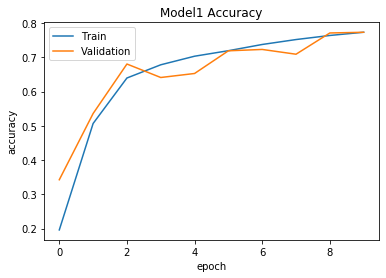

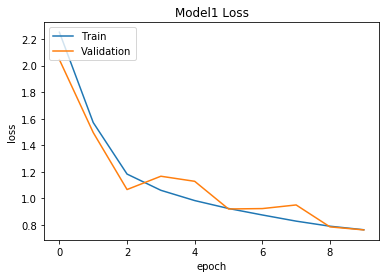

In [25]:
# summarizing history for accuracy
plt.plot(m1_history.history['acc'])
plt.plot(m1_history.history['val_acc'])
plt.title('Model1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarizing history for loss
plt.plot(m1_history.history['loss'])
plt.plot(m1_history.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
model1_result=model1.evaluate(X_test,y_test,verbose=1)

18000/18000 [==============================] - 5s 301us/sample - loss: 0.8250 - acc: 0.7619


In [27]:

print("Model1 Accuracy : {0}".format(model1_result[1]*100))

Model1 Accuracy : 76.19444727897644


In [28]:
print("Model1 Loss : {0}".format(model1_result[0]*100))

Model1 Loss : 82.49857704904345


In [29]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,688,138
Trainable params: 3,688,138
Non-trainable params: 0
_________________________________________________________________
